## Import libraries

In [100]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
from IPython.display import JSON
import isodate
import os
from dateutil import parser

#Google
import googleapiclient.errors

#Data viz packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

#Linear regression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

#NLP
from wordcloud import WordCloud
from nltk.corpus import stopwords

## Import dataset

In [2]:
api_key = '*************'

In [3]:
channel_ids = ['UCjVwBKqRh8ckPWhfD5UDKcg', # Lindie Botes
               'UCpNUYWW0kiqyh0j5Qy3aU7w', # Mısra Turp	
               'UCzaW4N846u7afcj8qSjhzlQ', # extrasunbeamsjess
               'UC51fwc9aSHDgOu29cyo2-TQ', # Ana Wallace Johnson
               'UCvjgXvBlbQiydffZU7m1_aw', # The Coding Train	
               'UCSDSUZEHygHRzqHiu7WlBGQ', # 챌린지유 challenzyu	
               'UC2Kyj04yISmHr1V-UlJz4eg', # Jared Henderson	
               'UCAzGH2CyS_zpTiG6U6j3e1g', # Katherine Karas	
               'UCzH-UT7eOGpsMC_al8ZQmOQ', # cup of jasmien	
               'UCfeMEuhdUtxtaUMNSvxq_Xg', # Frying Pan	
               'UCpCSAcbqs-sjEVfk_hMfY9w', # Zach Star	
               'UC1_uAIS3r8Vu6JjXWvastJg', # Mathologer
               'UCvH6u_Qzn5RQdz9W198umDw', # 한국고전영화 Korean Classic Film	
               'UCx-mOPGnEsSj2MKnRyozQOQ', # paperbackdreams
               'UCL5kBJmBUVFLYBDiSiK1VDw', # The Cinema Cartography	
               'UCafEZMU5s8geb9oIly6xTrg', # Robin Waldun	
               'UC5Dw9TFdbPJoTDMSiJdIQTA', # Whatifalthist
               'UCOg0aMAXmF3o5m243PxhE5g', # Timeless Classic Movies	
               'UCNiolZNLiJplmCCzqk9-czQ', # Be Kind Rewind	
               'UCC26K7LTSrJK0BPAUyyvtQg', # Brandon James Greer	
               'UCfvIqreCk628yB9mp3e_ABQ', # Draftsmen
               'UCvW8norVMTLt7QN-s2pS4Bw', # 조승연의 탐구생활	
               'UCRbjtZUrNAQe7w5c03JCMXw', # 민음사TV	
               'UCDWI-z2COrkqYgAqci5HN5Q', # 솔의 서재	
               'UCSkzHxIcfoEr69MWBdo0ppg', # Jonas Čeika - CCK Philosophy	
               'UCgheNMc3gGHLsT-RISdCzDQ', # 세바시 강연 Sebasi Talk	
               'UCyl_qjLxSuYB6FAA8DIHBcQ', # Cynthetic
               'UCQxQD-vpoTIXxBq5JayeKmw', # Orpheus
               'UCMAIkRmWHJ0JocHjmwoE_Tw', # Dion Wyn	
               'UCVHxJghKAB_kA_5LMM8MD3w', # oliSUNvia
               'UCKw7Jsu2cMU_D4yK8VMms1Q', # 이연LEEYEON	
               'UCgHGPOxUMfWsiy1ZyR-tLVw', # Livakivi	
               'UCKEsNLj039vCpFUZ9cmpvRg', # Johnny Chiodini	
               'UCrY6MKSkOlKDBISvM2zEgoQ', # Better Than Food	
               'UCL8LpidGE2wDNOZCKrfN3zA' # PaperBird
               #more channels here
               ]


In [4]:
api_service_name = "youtube"
api_version = "v3"

 # Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [5]:
def get_channel_stats(youtube, channel_ids):

    all_data = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids) 
    )
    response = request.execute()

    # loop through 
    for item in response['items']:
        data = {'channelName' : item['snippet']['title'],
                'subscribers' : item['statistics']['subscriberCount'],
                'views' : item['statistics']['viewCount'],
                'totalVideos' : item['statistics']['videoCount'],
                'playlistId' : item['contentDetails']['relatedPlaylists']['uploads']    
        }

        all_data.append(data)
    return(pd.DataFrame(all_data))

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,extrasunbeamsjess,127000,19582719,298,UUzaW4N846u7afcj8qSjhzlQ
1,Lindie Botes,326000,30830252,355,UUjVwBKqRh8ckPWhfD5UDKcg
2,Ana Wallace Johnson,14800,535822,88,UU51fwc9aSHDgOu29cyo2-TQ
3,Draftsmen,80800,4000644,126,UUfvIqreCk628yB9mp3e_ABQ
4,조승연의 탐구생활,1590000,149627708,340,UUvW8norVMTLt7QN-s2pS4Bw
5,Whatifalthist,520000,89731816,306,UU5Dw9TFdbPJoTDMSiJdIQTA
6,세바시 강연 Sebasi Talk,1770000,431040283,2669,UUgheNMc3gGHLsT-RISdCzDQ
7,Livakivi,40100,4225274,41,UUgHGPOxUMfWsiy1ZyR-tLVw
8,Cynthetic,42400,6594180,362,UUyl_qjLxSuYB6FAA8DIHBcQ
9,cup of jasmien,534000,38712932,213,UUzH-UT7eOGpsMC_al8ZQmOQ


In [7]:
playlist_ids = ["UUjVwBKqRh8ckPWhfD5UDKcg", # Lindie Botes
                "UUpNUYWW0kiqyh0j5Qy3aU7w", # Mısra Turp	
                "UUzaW4N846u7afcj8qSjhzlQ", # extrasunbeamsjess
                "UU51fwc9aSHDgOu29cyo2-TQ", # Ana Wallace Johnson
                "UUvjgXvBlbQiydffZU7m1_aw", # The Coding Train	
                "UUSDSUZEHygHRzqHiu7WlBGQ", # 챌린지유 challenzyu	
                "UU2Kyj04yISmHr1V-UlJz4eg", # Jared Henderson
                "UUAzGH2CyS_zpTiG6U6j3e1g", # Katherine Karas	
                "UUzH-UT7eOGpsMC_al8ZQmOQ", # cup of jasmien
                "UUfeMEuhdUtxtaUMNSvxq_Xg", # Frying Pan	
                "UUpCSAcbqs-sjEVfk_hMfY9w", # Zach Star
                "UU1_uAIS3r8Vu6JjXWvastJg", # Mathologer
                "UUvH6u_Qzn5RQdz9W198umDw", # 한국고전영화 Korean Classic Film
                "UUx-mOPGnEsSj2MKnRyozQOQ", # paperbackdreams
                "UUL5kBJmBUVFLYBDiSiK1VDw", # The Cinema Cartography	
                "UUafEZMU5s8geb9oIly6xTrg", # Robin Waldun
                "UU5Dw9TFdbPJoTDMSiJdIQTA", # Whatifalthist
                "UUOg0aMAXmF3o5m243PxhE5g", # Timeless Classic Movies
                "UUNiolZNLiJplmCCzqk9-czQ", # Be Kind Rewind	
                "UUC26K7LTSrJK0BPAUyyvtQg", # Brandon James Greer
                "UUfvIqreCk628yB9mp3e_ABQ", # Draftsmen
                "UUvW8norVMTLt7QN-s2pS4Bw", # 조승연의 탐구생활
                "UURbjtZUrNAQe7w5c03JCMXw", # 민음사TV 
                "UUDWI-z2COrkqYgAqci5HN5Q", # 솔의 서재
                "UUSkzHxIcfoEr69MWBdo0ppg", # Jonas Čeika - CCK Philosophy	
                "UUgheNMc3gGHLsT-RISdCzDQ", # 세바시 강연 Sebasi Talk
                "UUyl_qjLxSuYB6FAA8DIHBcQ", # Cynthetic
                "UUQxQD-vpoTIXxBq5JayeKmw", # Orpheus
                "UUMAIkRmWHJ0JocHjmwoE_Tw", # Dion Wyn
                "UUVHxJghKAB_kA_5LMM8MD3w", # oliSUNvia
                "UUKw7Jsu2cMU_D4yK8VMms1Q", # 이연LEEYEON
                "UUgHGPOxUMfWsiy1ZyR-tLVw", # Livakivi
                "UUKEsNLj039vCpFUZ9cmpvRg", # Johnny Chiodini
                "UUrY6MKSkOlKDBISvM2zEgoQ", # Better Than Food
                "UUL8LpidGE2wDNOZCKrfN3zA"]  # PaperBird
def get_video_ids(youtube, playlist_ids):
    video_ids = []

    for playlist_id in playlist_ids:
        request = youtube.playlistItems().list(
            part="snippet, contentDetails",
            playlistId=playlist_id,
            maxResults=50
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        while next_page_token is not None:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token
            )
            response = request.execute()

            for item in response['items']:
                video_ids.append(item['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids


playlist_ids = ["UUjVwBKqRh8ckPWhfD5UDKcg", 
                "UUpNUYWW0kiqyh0j5Qy3aU7w", 
                "UUzaW4N846u7afcj8qSjhzlQ", 
                "UU51fwc9aSHDgOu29cyo2-TQ", 
                "UUvjgXvBlbQiydffZU7m1_aw", 
                "UUSDSUZEHygHRzqHiu7WlBGQ", 
                "UU2Kyj04yISmHr1V-UlJz4eg", 
                "UUAzGH2CyS_zpTiG6U6j3e1g", 
                "UUzH-UT7eOGpsMC_al8ZQmOQ", 
                "UUfeMEuhdUtxtaUMNSvxq_Xg", 
                "UUpCSAcbqs-sjEVfk_hMfY9w", 
                "UU1_uAIS3r8Vu6JjXWvastJg", 
                "UUvH6u_Qzn5RQdz9W198umDw",
                "UUx-mOPGnEsSj2MKnRyozQOQ",
                "UUL5kBJmBUVFLYBDiSiK1VDw",
                "UUafEZMU5s8geb9oIly6xTrg",
                "UU5Dw9TFdbPJoTDMSiJdIQTA",
                "UUOg0aMAXmF3o5m243PxhE5g",
                "UUNiolZNLiJplmCCzqk9-czQ",
                "UUC26K7LTSrJK0BPAUyyvtQg",
                "UUfvIqreCk628yB9mp3e_ABQ",
                "UUvW8norVMTLt7QN-s2pS4Bw",
                "UURbjtZUrNAQe7w5c03JCMXw",
                "UUDWI-z2COrkqYgAqci5HN5Q",
                "UUSkzHxIcfoEr69MWBdo0ppg",
                "UUgheNMc3gGHLsT-RISdCzDQ",
                "UUyl_qjLxSuYB6FAA8DIHBcQ",
                "UUQxQD-vpoTIXxBq5JayeKmw",
                "UUMAIkRmWHJ0JocHjmwoE_Tw",
                "UUVHxJghKAB_kA_5LMM8MD3w",
                "UUKw7Jsu2cMU_D4yK8VMms1Q",
                "UUgHGPOxUMfWsiy1ZyR-tLVw",
                "UUKEsNLj039vCpFUZ9cmpvRg",
                "UUrY6MKSkOlKDBISvM2zEgoQ",
                "UUL8LpidGE2wDNOZCKrfN3zA"]
video_ids = get_video_ids(youtube, playlist_ids)


In [8]:
video_ids = get_video_ids(youtube, playlist_ids)

In [9]:
len(video_ids)

9861

In [10]:
def get_video_details(youtube, video_ids):

    all_video_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet, contentDetails, statistics",
            id = ','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishAt'],
                            'statistics': ['viewCount', 'likeCount', 'commentCount'],
                            'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v] 
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)

## Data Preprocessing

In [11]:
#Get video details
video_df = get_video_details(youtube, video_ids)
video_df.head()

,video_id,channelTitle,title,description,tags,publishAt,viewCount,likeCount,commentCount,duration,definition,caption
0,p4fEObV7Scg,Lindie Botes,Two of my favorite Japanese textbooks for inte...,Book links: https://geni.us/500N2 (JLPT prep r...,None,None,2441,261,8,PT16S,hd,false
1,bXSVhNPAuyo,Lindie Botes,What should you learn when starting a new lang...,,None,None,4409,573,16,PT53S,hd,false
2,cl0Wp2HoMW4,Lindie Botes,Korean FAIL online! Be careful buying from cre...,,None,None,3980,253,9,PT32S,hd,false
3,N1WnUNVCpnE,Lindie Botes,Language learning tips for beginners! #newlang...,,None,None,4534,502,7,PT1M,hd,false
4,B2Uvu69fC6g,Lindie Botes,Korean literature recommendation! I’ll Be Righ...,,None,None,2130,217,3,PT1M,hd,false


In [12]:
video_df_modified = video_df.copy()
video_df_modified.head()

,video_id,channelTitle,title,description,tags,publishAt,viewCount,likeCount,commentCount,duration,definition,caption
0,p4fEObV7Scg,Lindie Botes,Two of my favorite Japanese textbooks for inte...,Book links: https://geni.us/500N2 (JLPT prep r...,None,None,2441,261,8,PT16S,hd,false
1,bXSVhNPAuyo,Lindie Botes,What should you learn when starting a new lang...,,None,None,4409,573,16,PT53S,hd,false
2,cl0Wp2HoMW4,Lindie Botes,Korean FAIL online! Be careful buying from cre...,,None,None,3980,253,9,PT32S,hd,false
3,N1WnUNVCpnE,Lindie Botes,Language learning tips for beginners! #newlang...,,None,None,4534,502,7,PT1M,hd,false
4,B2Uvu69fC6g,Lindie Botes,Korean literature recommendation! I’ll Be Righ...,,None,None,2130,217,3,PT1M,hd,false


### Handle missing values

In [13]:
video_df_modified.isnull().any()

video_id        False
channelTitle    False
title           False
description     False
tags             True
publishAt        True
viewCount        True
likeCount        True
commentCount     True
duration        False
definition      False
caption         False
dtype: bool

In [14]:
isnull_lookup = video_df_modified[video_df_modified['channelTitle'] == 'Lindie Botes']
isnull_lookup.isnull().sum()

video_id          0
channelTitle      0
title             0
description       0
tags             20
publishAt       355
viewCount         0
likeCount         2
commentCount      1
duration          0
definition        0
caption           0
dtype: int64

In [15]:
isnull_lookup = video_df_modified[video_df_modified['channelTitle'] == 'PaperBird']
isnull_lookup.isnull().sum()

video_id         0
channelTitle     0
title            0
description      0
tags             2
publishAt       97
viewCount        0
likeCount        0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [20]:
video_df_modified.loc[(video_df_modified['channelTitle'] == 'PaperBird') & (video_df_modified['title'] == 'Javier Marias - A Heart So White - Book Review'), 'tags'] = '[Javier Marias, Review]'

In [17]:
paperbird_tags = video_df_modified[(video_df_modified['channelTitle'] == 'PaperBird') & video_df_modified['tags']]
paperbird_tags.head()

,video_id,channelTitle,title,description,tags,publishAt,viewCount,likeCount,commentCount,duration,definition,caption
9764,zqn3t_ONNxY,PaperBird,Claude Simon - The Flanders Road - Book Review,Taking a look at the work of Claude Simon\n\n\...,"[Claude Simon, The Flanders Road, book review,...",None,2347,225,63,PT8M28S,hd,false
9765,swyOvF3Oqqc,PaperBird,Pierre Michon - The Origin of the World - Book...,Taking a look at the work of Pierre Michon\n\n...,"[Pierre Michon, Wyatt Mason, Theodore de Banvi...",None,3000,237,43,PT6M56S,hd,false
9766,pQq0y0PNNng,PaperBird,Tomas Espedal - Against Nature - Book Review,Taking a look at the work of Tomas Espedal\n\n...,"[Tomas Espedal, Karl Ove Knausgaard, Against N...",None,2734,196,55,PT6M51S,hd,false
9767,S77O3-w02mE,PaperBird,Rick Bass - The Traveling Feast - Book Review,"In his mid-50s, Rick Bass goes on a journey to...","[Rick Bass, Jim Harrison, Amy Hempel, Gordon L...",None,2752,185,69,PT9M6S,hd,false
9768,7_FPE4v-8lo,PaperBird,Juan Benet - A Meditation - Book Review,Taking a look at the work of Juan Benet\n\n---...,"[Juan Benet, A Meditation, William Faulkner, C...",None,3416,244,81,PT7M15S,hd,false


In [21]:
paperbird_tags_null = video_df_modified[(video_df_modified['channelTitle'] == 'PaperBird') & video_df_modified['tags'].isnull()]
paperbird_tags_null

,video_id,channelTitle,title,description,tags,publishAt,viewCount,likeCount,commentCount,duration,definition,caption


In [22]:
video_df_modified.loc[(video_df_modified['channelTitle'] == '한국고전영화 Korean Classic Film') & (video_df_modified['tags'].isnull()), 'tags'] = '[한국영화, 영화, film, archive]'

In [23]:
isnull_lookup = video_df_modified[video_df_modified['channelTitle'] == '한국고전영화 Korean Classic Film']
isnull_lookup.isnull().sum()

video_id          0
channelTitle      0
title             0
description       0
tags              0
publishAt       253
viewCount         0
likeCount         0
commentCount      1
duration          0
definition        0
caption           0
dtype: int64

#### Because the 'publishAt' column has many missing values, I decided to drop it.

In [149]:
video_df_modified.dropna(subset=['publishAt'], axis=0, inplace=True)

In [24]:
tags_null = video_df_modified[(video_df_modified['channelTitle'] == '한국고전영화 Korean Classic Film') & video_df_modified['commentCount'].isnull()]
tags_null.head()

,video_id,channelTitle,title,description,tags,publishAt,viewCount,likeCount,commentCount,duration,definition,caption
3127,pX5c_4NWnio,한국고전영화 Korean Classic Film,수학여행(1968) / School Excursion (Suhag Yeohaeng),게시일: 2019. 10. 1.\n영화의 자세한 정보를 보려면 아래의 웹주소를 방문...,"[한국영화, 한국고전영화, Korean Film, Korean Classic Fil...",None,160678,1097,None,PT1H41M10S,sd,true


In [150]:
video_df_modified.dtypes

video_id               object
channelTitle           object
title                  object
description            object
tags                   object
publishAt              object
viewCount             float64
likeCount             float64
commentCount          float64
duration               object
definition             object
caption                object
durationSecs          float64
tagCount                int64
publishDayName         object
title_no_stopwords     object
dtype: object

### Convert types of the columns

In [26]:
# Changing numeric columns to float type
numeric_cols = ['viewCount', 'likeCount', 'commentCount']
video_df_modified[numeric_cols] = video_df_modified[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [27]:
video_df_modified['durationSecs'] = video_df_modified['duration'].apply(lambda x: isodate.parse_duration(x))
video_df_modified['durationSecs'] = video_df_modified['durationSecs'].dt.total_seconds()

In [28]:
video_df_modified[['durationSecs', 'duration']]

,durationSecs,duration
0,16.0,PT16S
1,53.0,PT53S
2,32.0,PT32S
3,60.0,PT1M
4,60.0,PT1M
...,...,...
9856,129.0,PT2M9S
9857,644.0,PT10M44S
9858,494.0,PT8M14S
9859,517.0,PT8M37S


In [29]:
#Add tag
video_df_modified['tagCount'] = video_df_modified['tags'].apply(lambda x: 0 if x is None else len(x))

In [30]:
video_df_modified['publishAt'] = video_df_modified['publishAt'].apply(lambda x: parser.parse(x) if x is not None else None)
video_df_modified['publishDayName'] = video_df_modified['publishAt'].apply(lambda x: x.strftime("%A") if x is not None else None)

In [31]:
video_df_modified.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishAt          object
viewCount         float64
likeCount         float64
commentCount      float64
duration           object
definition         object
caption            object
durationSecs      float64
tagCount            int64
publishDayName     object
dtype: object

In [ ]:
# Save raw DataFrame as a CSV file
video_df.to_csv('raw_data.csv', index=False)

# Exploratory data analysis

### Which channels have the highest number of subscribers?

In [32]:
# Which channels have the highest number of subscribers?

# Convert 'subscribers' column to integer data type
channel_stats['subscribers'] = channel_stats['subscribers'].astype(int)
subscribers_ranked = channel_stats.sort_values('subscribers', ascending=False)
subscribers_ranked


,channelName,subscribers,views,totalVideos,playlistId
6,세바시 강연 Sebasi Talk,1770000,431040283,2669,UUgheNMc3gGHLsT-RISdCzDQ
4,조승연의 탐구생활,1590000,149627708,340,UUvW8norVMTLt7QN-s2pS4Bw
30,The Coding Train,1590000,115785301,1220,UUvjgXvBlbQiydffZU7m1_aw
16,Zach Star,1210000,120971624,246,UUpCSAcbqs-sjEVfk_hMfY9w
33,Mathologer,872000,64933521,95,UU1_uAIS3r8Vu6JjXWvastJg
29,이연LEEYEON,860000,73608215,289,UUKw7Jsu2cMU_D4yK8VMms1Q
10,한국고전영화 Korean Classic Film,812000,316959032,253,UUvH6u_Qzn5RQdz9W198umDw
32,oliSUNvia,730000,27588397,38,UUVHxJghKAB_kA_5LMM8MD3w
17,The Cinema Cartography,639000,27244620,73,UUL5kBJmBUVFLYBDiSiK1VDw
9,cup of jasmien,534000,38712932,213,UUzH-UT7eOGpsMC_al8ZQmOQ


d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 268 (\N{LATIN CAPITAL LETTER C WITH CARON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


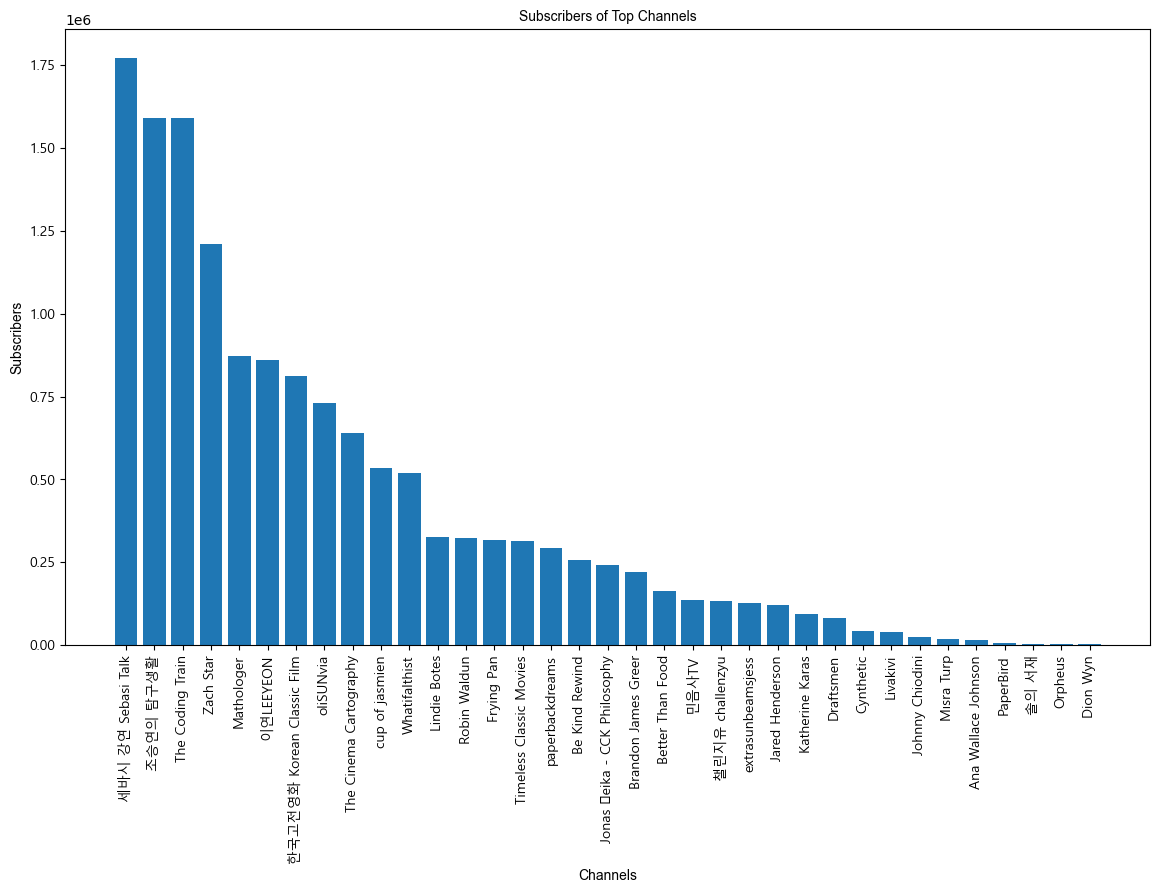

In [35]:
# Set the font properties
english_font_path = 'ARIAL.TTF'
korean_font_path = 'MALGUN.TTF'

english_font_prop = fm.FontProperties(fname='..\ARIAL.TTF')
korean_font_prop = fm.FontProperties(fname='..\MALGUN.TTF')

# Get the channel names and subscribers from the sorted dataframe
channels = subscribers_ranked['channelName']
subscribers = subscribers_ranked['subscribers']

# Plotting the bar chart
plt.figure(figsize=(14, 8)) 
plt.bar(channels, subscribers) 
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Use the font properties for labels and title
plt.xlabel('Channels', fontproperties=english_font_prop)
plt.ylabel('Subscribers', fontproperties=english_font_prop)
plt.title('Subscribers of Top Channels', fontproperties=english_font_prop)

# Specify Korean font for Korean labels
plt.xticks(fontproperties=korean_font_prop)
plt.yticks(fontproperties=korean_font_prop)

# Display the chart
plt.show()


###  Which channels have the highest number of views?


In [36]:
#  Which channels have the highest number of views?

channel_stats['views'] = channel_stats['views'].astype(int)
views_ranked = channel_stats.sort_values('views', ascending=False)
views_ranked

,channelName,subscribers,views,totalVideos,playlistId
6,세바시 강연 Sebasi Talk,1770000,431040283,2669,UUgheNMc3gGHLsT-RISdCzDQ
10,한국고전영화 Korean Classic Film,812000,316959032,253,UUvH6u_Qzn5RQdz9W198umDw
4,조승연의 탐구생활,1590000,149627708,340,UUvW8norVMTLt7QN-s2pS4Bw
16,Zach Star,1210000,120971624,246,UUpCSAcbqs-sjEVfk_hMfY9w
30,The Coding Train,1590000,115785301,1220,UUvjgXvBlbQiydffZU7m1_aw
5,Whatifalthist,520000,89731816,306,UU5Dw9TFdbPJoTDMSiJdIQTA
29,이연LEEYEON,860000,73608215,289,UUKw7Jsu2cMU_D4yK8VMms1Q
33,Mathologer,872000,64933521,95,UU1_uAIS3r8Vu6JjXWvastJg
13,Timeless Classic Movies,313000,56672569,174,UUOg0aMAXmF3o5m243PxhE5g
9,cup of jasmien,534000,38712932,213,UUzH-UT7eOGpsMC_al8ZQmOQ


d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 268 (\N{LATIN CAPITAL LETTER C WITH CARON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


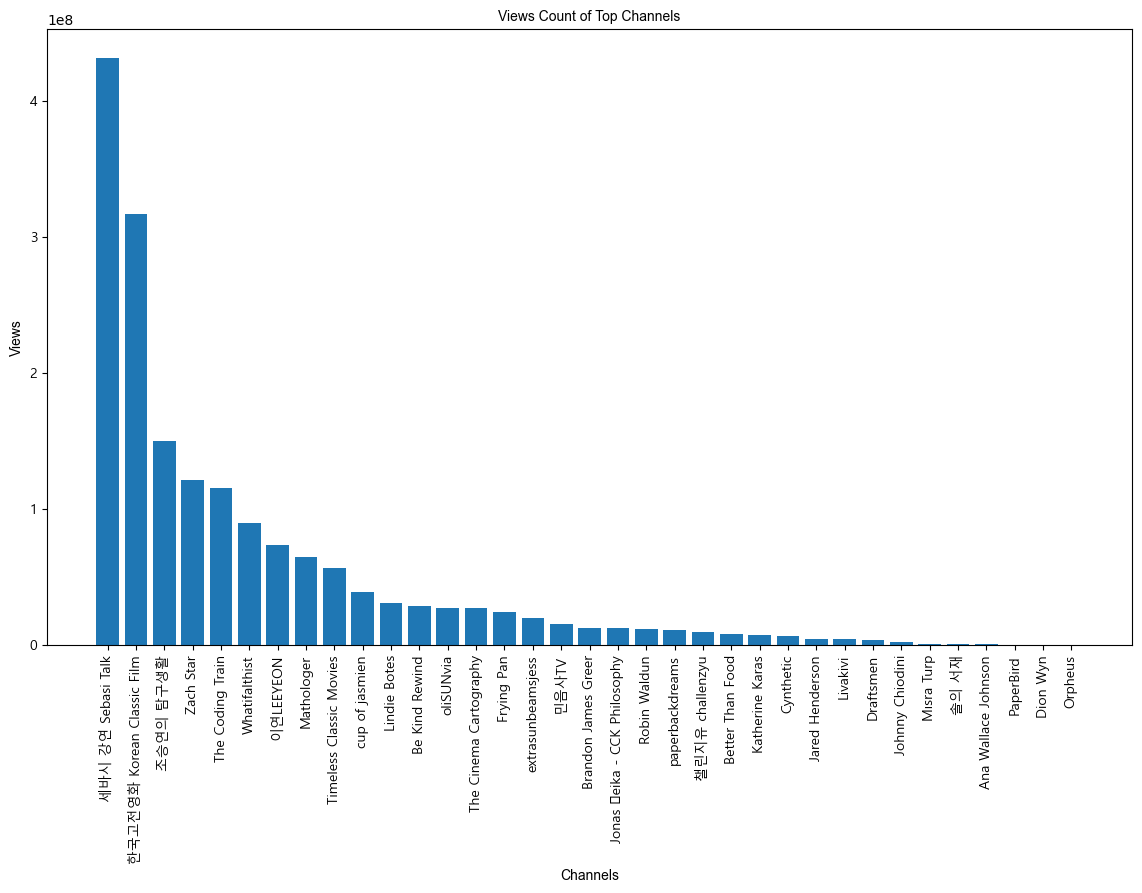

In [37]:
# Set the font properties
english_font_path = 'ARIAL.TTF'
korean_font_path = 'MALGUN.TTF'

english_font_prop = fm.FontProperties(fname='..\ARIAL.TTF')
korean_font_prop = fm.FontProperties(fname='..\MALGUN.TTF')

# Get the channel names and subscribers from the sorted dataframe
channels = views_ranked['channelName']
views = views_ranked['views']

# Plotting the bar chart
plt.figure(figsize=(14, 8)) 
plt.bar(channels, views) 
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Use the font properties for labels and title
plt.xlabel('Channels', fontproperties=english_font_prop)
plt.ylabel('Views', fontproperties=english_font_prop)
plt.title('Views Count of Top Channels', fontproperties=english_font_prop)

# Specify Korean font for Korean labels
plt.xticks(fontproperties=korean_font_prop)
plt.yticks(fontproperties=korean_font_prop)

# Display the chart
plt.show()


### Which channels have the highest number of likes?


In [154]:
#  Which channels have the highest number of likes?

video_df_modified['likeCount'] = video_df_modified['likeCount'].astype(float)
likes_ranked = video_df_modified.sort_values('likeCount', ascending=False)

d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 268 (\N{LATIN CAPITAL LETTER C WITH CARON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


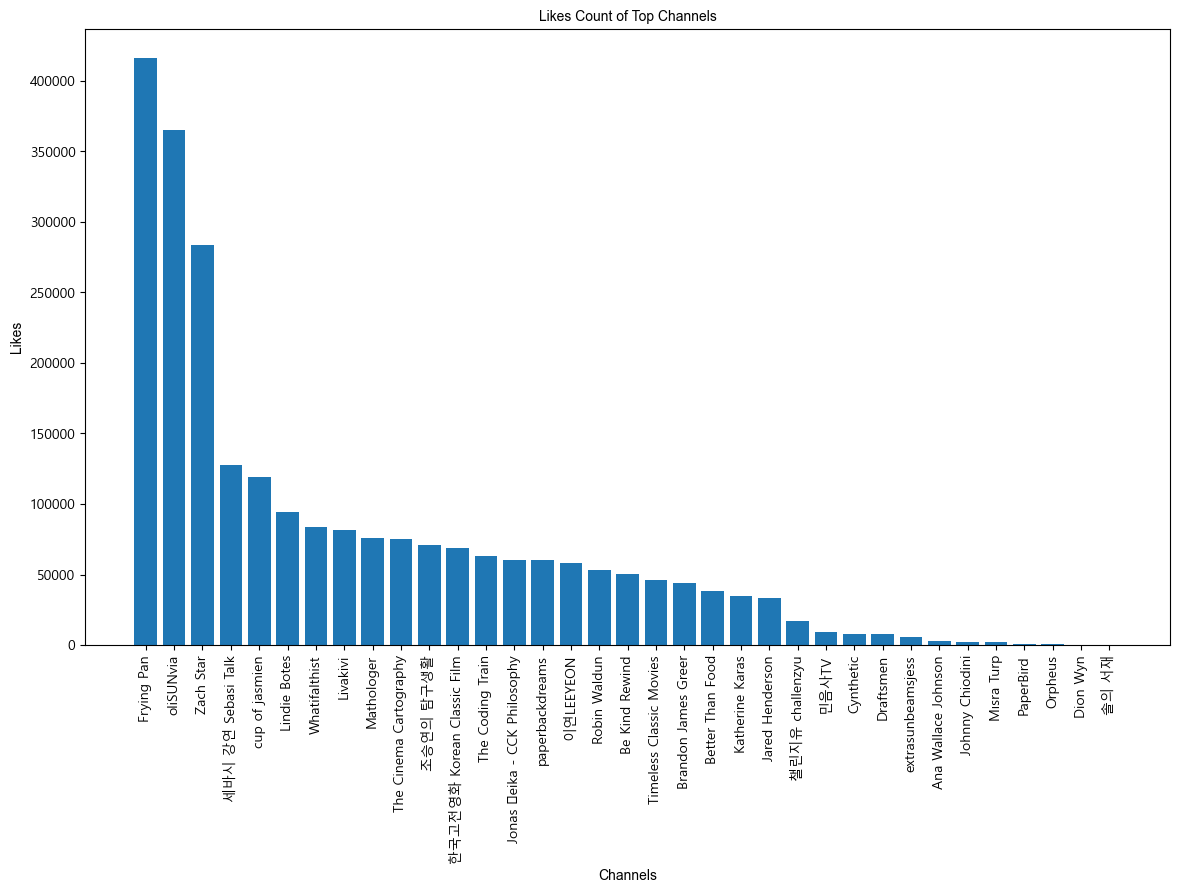

In [40]:
# Set the font properties
english_font_path = 'ARIAL.TTF'
korean_font_path = 'MALGUN.TTF'

english_font_prop = fm.FontProperties(fname='..\ARIAL.TTF')
korean_font_prop = fm.FontProperties(fname='..\MALGUN.TTF')

# Get the channel names and subscribers from the sorted dataframe
channels = likes_ranked['channelTitle']
likes = likes_ranked['likeCount']

# Plotting the bar chart
plt.figure(figsize=(14, 8)) 
plt.bar(channels, likes) 
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Use the font properties for labels and title
plt.xlabel('Channels', fontproperties=english_font_prop)
plt.ylabel('Likes', fontproperties=english_font_prop)
plt.title('Likes Count of Top Channels', fontproperties=english_font_prop)

# Specify Korean font for Korean labels
plt.xticks(fontproperties=korean_font_prop)
plt.yticks(fontproperties=korean_font_prop)

# Display the chart
plt.show()


### Exploring proportions

In [45]:
channel_stats['views'] = channel_stats['views'].astype(float)

# Calculate proportion of views
channel_stats['viewsProportion'] = channel_stats['views'] / channel_stats['subscribers'].astype(int)

viewsProportion_ranked = channel_stats.sort_values('viewsProportion', ascending=False)
viewsProportion_ranked

,channelName,subscribers,views,totalVideos,playlistId,viewsProportion
10,한국고전영화 Korean Classic Film,812000,316959032.0,253,UUvH6u_Qzn5RQdz9W198umDw,390.343635
6,세바시 강연 Sebasi Talk,1770000,431040283.0,2669,UUgheNMc3gGHLsT-RISdCzDQ,243.525584
13,Timeless Classic Movies,313000,56672569.0,174,UUOg0aMAXmF3o5m243PxhE5g,181.062521
5,Whatifalthist,520000,89731816.0,306,UU5Dw9TFdbPJoTDMSiJdIQTA,172.561185
8,Cynthetic,42400,6594180.0,362,UUyl_qjLxSuYB6FAA8DIHBcQ,155.523113
0,extrasunbeamsjess,127000,19582719.0,298,UUzaW4N846u7afcj8qSjhzlQ,154.194638
11,솔의 서재,4450,596847.0,271,UUDWI-z2COrkqYgAqci5HN5Q,134.122921
20,민음사TV,135000,15354911.0,389,UURbjtZUrNAQe7w5c03JCMXw,113.740081
28,Be Kind Rewind,256000,28435271.0,83,UUNiolZNLiJplmCCzqk9-czQ,111.075277
7,Livakivi,40100,4225274.0,41,UUgHGPOxUMfWsiy1ZyR-tLVw,105.368429


In [48]:
channel_stats['totalVideos'] = channel_stats['totalVideos'].astype(int)

# Convert 'subscribers' column to numeric type
channel_stats['subscribers'] = channel_stats['subscribers'].astype(int)

# Calculate proportion of video count
channel_stats['videoProportion'] = channel_stats['totalVideos'] / channel_stats['subscribers']

# Sort the DataFrame by videoProportion in descending order
video_count_proportion = channel_stats.sort_values('videoProportion', ascending=False)
video_count_proportion


,channelName,subscribers,views,totalVideos,playlistId,viewsProportion,totalVideos\t,videoProportion
22,Dion Wyn,2220,214281.0,281,UUMAIkRmWHJ0JocHjmwoE_Tw,96.522973,281.0,0.126577
25,Orpheus,2520,194002.0,170,UUQxQD-vpoTIXxBq5JayeKmw,76.984921,170.0,0.067460
11,솔의 서재,4450,596847.0,271,UUDWI-z2COrkqYgAqci5HN5Q,134.122921,271.0,0.060899
12,PaperBird,6720,388162.0,97,UUL8LpidGE2wDNOZCKrfN3zA,57.762202,97.0,0.014435
21,Johnny Chiodini,24600,2551559.0,264,UUKEsNLj039vCpFUZ9cmpvRg,103.721911,264.0,0.010732
8,Cynthetic,42400,6594180.0,362,UUyl_qjLxSuYB6FAA8DIHBcQ,155.523113,362.0,0.008538
15,Mısra Turp,19600,745088.0,140,UUpNUYWW0kiqyh0j5Qy3aU7w,38.014694,140.0,0.007143
2,Ana Wallace Johnson,14800,535822.0,88,UU51fwc9aSHDgOu29cyo2-TQ,36.204189,88.0,0.005946
20,민음사TV,135000,15354911.0,389,UURbjtZUrNAQe7w5c03JCMXw,113.740081,389.0,0.002881
18,Katherine Karas,92800,7421480.0,231,UUAzGH2CyS_zpTiG6U6j3e1g,79.972845,231.0,0.002489


### Compering one channel to another with a violin plot

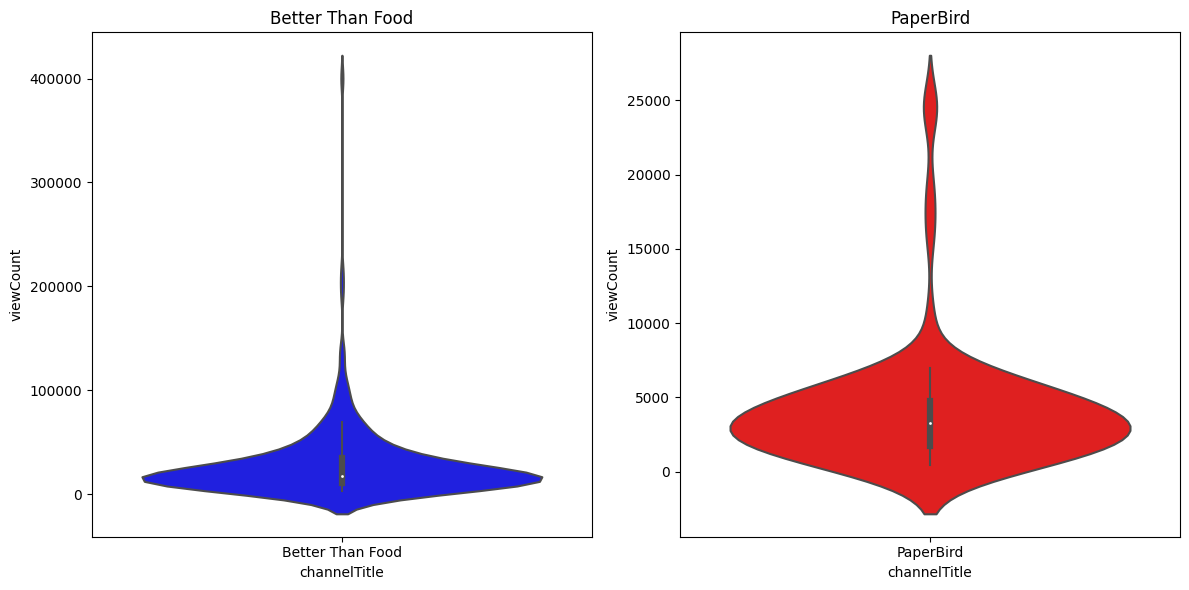

In [51]:
# Create subplots with two frames
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the first violin plot in the first frame
sns.violinplot(x='channelTitle', y='viewCount', data=video_df_modified[video_df_modified['channelTitle'] == 'Better Than Food'], color='blue', ax=ax1)
ax1.set_title('Better Than Food')  # Set title for the first plot

# Create the second violin plot in the second frame
sns.violinplot(x='channelTitle', y='viewCount', data=video_df_modified[video_df_modified['channelTitle'] == 'PaperBird'], color='red', ax=ax2)
ax2.set_title('PaperBird')  # Set title for the second plot

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Display the chart
plt.show()


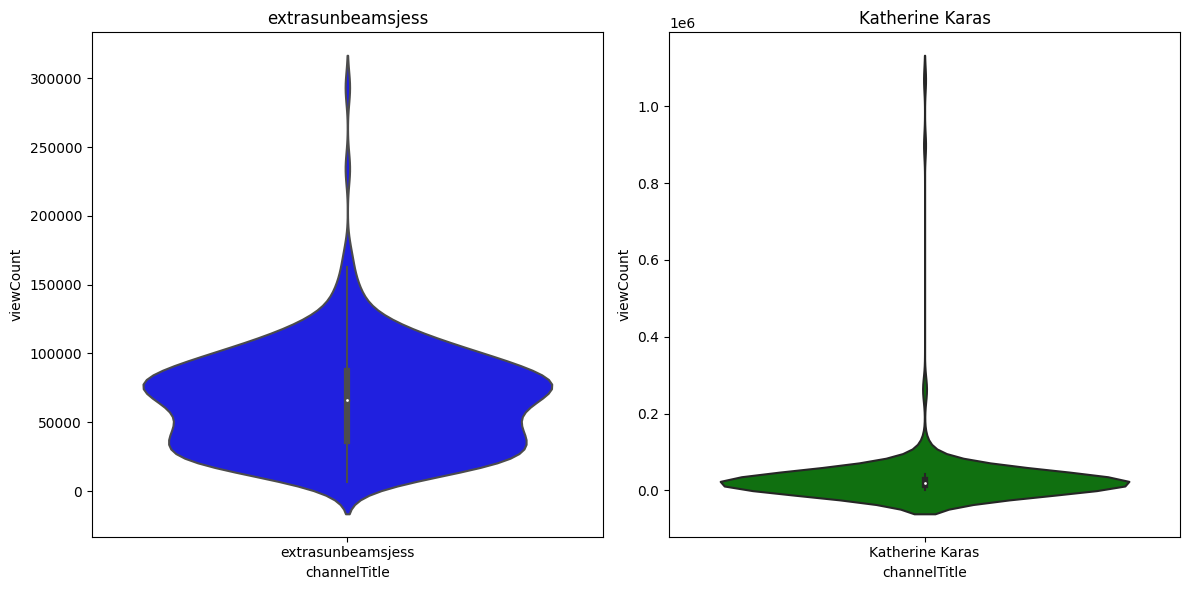

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(x='channelTitle', y='viewCount', data=video_df_modified[video_df_modified['channelTitle'] == 'extrasunbeamsjess'], color='blue', ax=ax1)
ax1.set_title('extrasunbeamsjess')  # Set title for the first plot

sns.violinplot(x='channelTitle', y='viewCount', data=video_df_modified[video_df_modified['channelTitle'] == 'Katherine Karas'], color='green', ax=ax2)
ax2.set_title('Katherine Karas')  # Set title for the second plot

plt.tight_layout()

plt.show()

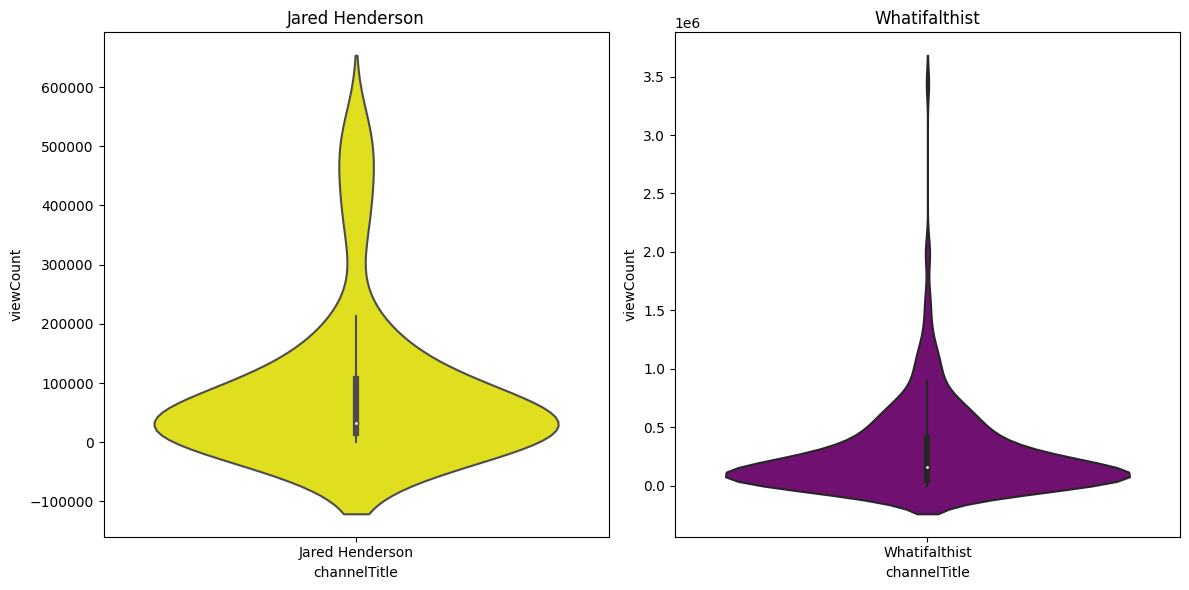

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(x='channelTitle', y='viewCount', data=video_df_modified[video_df_modified['channelTitle'] == 'Jared Henderson'], color='yellow', ax=ax1)
ax1.set_title('Jared Henderson')  # Set title for the first plot

sns.violinplot(x='channelTitle', y='viewCount', data=video_df_modified[video_df_modified['channelTitle'] == 'Whatifalthist'], color='purple', ax=ax2)
ax2.set_title('Whatifalthist')  # Set title for the second plot

plt.tight_layout()

plt.show()

### Correlation between subscribers and views

In [60]:
# Is there a correlation between the number of subscribers and views?
subs_views_correlation = channel_stats['subscribers'].corr(channel_stats['views'])
subs_views_correlation

0.7733079546167655

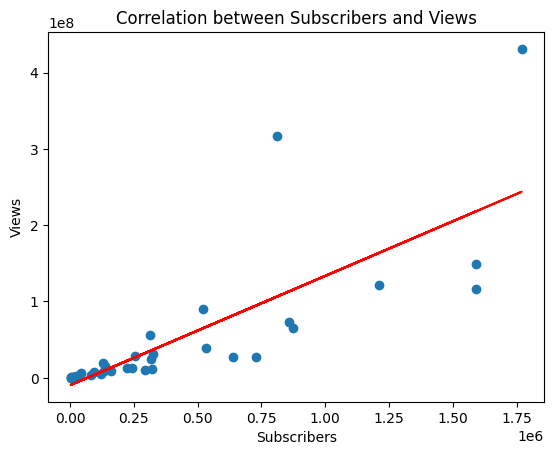

In [61]:
# Create a scatter plot
plt.scatter(channel_stats['subscribers'], channel_stats['views'])
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.title('Correlation between Subscribers and Views')

# Add a trendline (optional)
z = np.polyfit(channel_stats['subscribers'], channel_stats['views'], 1)
p = np.poly1d(z)
plt.plot(channel_stats['subscribers'], p(channel_stats['subscribers']), color='r')

# Show the plot
plt.show()

### What is the average number of subscribers, views, and videos per channel?


In [62]:
# What is the average number of subscribers, views, and videos per channel?
average_subscribers = channel_stats['subscribers'].mean()
average_views = channel_stats['views'].mean()
average_videos = channel_stats['totalVideos'].mean()

In [66]:
average_videos

287.4

## Compare the performance of each channel with others

### Which channel has the highest subscriber-to-view ratio?

In [67]:
#  Which channel has the highest subscriber-to-view ratio?
channel_stats['subscriber_to_view_ratio'] = channel_stats['subscribers'] / channel_stats['views']
max_ratio_channel = channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmax(), 'channelName']
max_ratio_channel

'Robin Waldun'

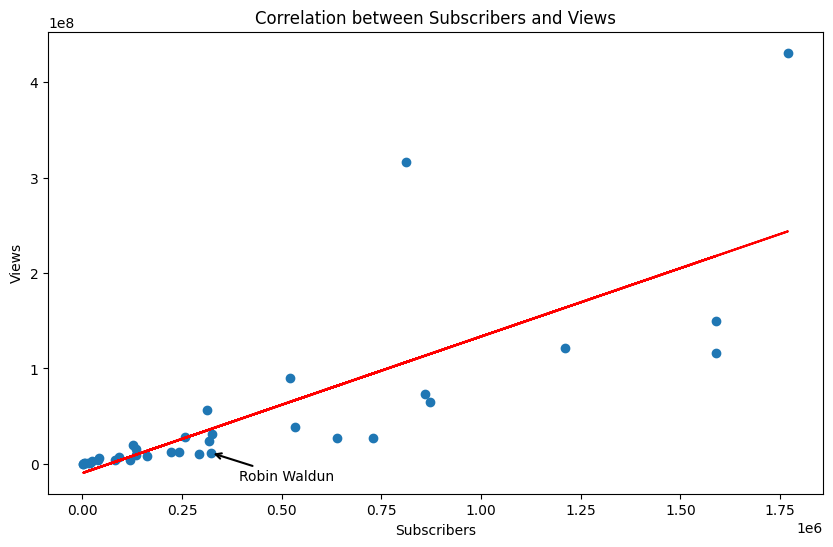

In [68]:
#  Which channel has the highest subscriber-to-view ratio?
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(channel_stats['subscribers'], channel_stats['views'])
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.title('Correlation between Subscribers and Views')

# Add a trendline (optional)
z = np.polyfit(channel_stats['subscribers'], channel_stats['views'], 1)
p = np.poly1d(z)
plt.plot(channel_stats['subscribers'], p(channel_stats['subscribers']), color='r')

# Find the channel with the highest subscriber-to-view ratio
channel_stats['subscriber_to_view_ratio'] = channel_stats['subscribers'] / channel_stats['views']
max_ratio_channel = channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmax(), 'channelName']

# Add text annotation for the channel with the highest ratio
plt.annotate(max_ratio_channel, xy=(channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmax(), 'subscribers'],
                                    channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmax(), 'views']),
             xytext=(20, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5))

# Show the plot
plt.show()


### Which channel has the lowest subscriber-to-view ratio?

In [69]:
#  Which channel has the lowest subscriber-to-view ratio?
channel_stats['subscriber_to_view_ratio'] = channel_stats['subscribers'] / channel_stats['views']
min_ratio_channel = channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmin(), 'channelName']
min_ratio_channel


'한국고전영화 Korean Classic Film'

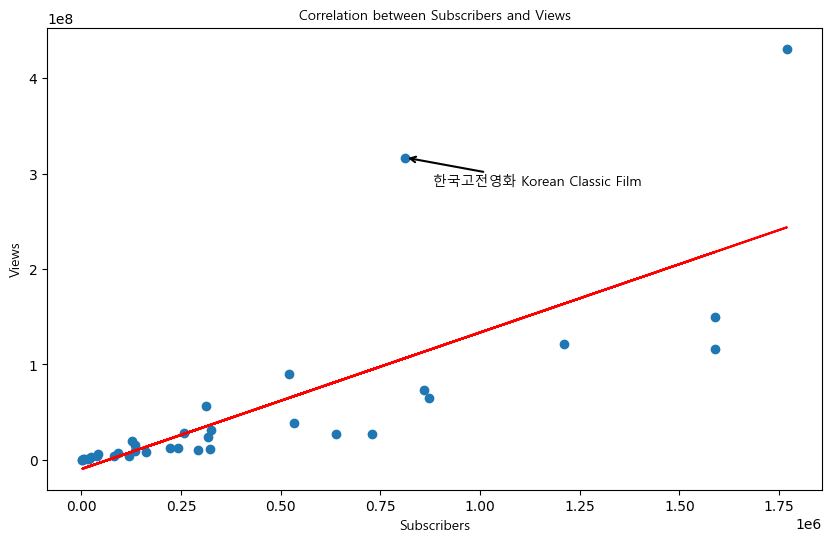

In [72]:
#  Which channel has the lowest subscriber-to-view ratio?

# Set the font properties
korean_font_path = 'MALGUN.TTF'
korean_font_prop = fm.FontProperties(fname='..\MALGUN.TTF')


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(channel_stats['subscribers'], channel_stats['views'])
plt.xlabel('Subscribers', fontproperties=korean_font_prop)
plt.ylabel('Views', fontproperties=korean_font_prop)
plt.title('Correlation between Subscribers and Views', fontproperties=korean_font_prop)

# Add a trendline (optional)
z = np.polyfit(channel_stats['subscribers'], channel_stats['views'], 1)
p = np.poly1d(z)
plt.plot(channel_stats['subscribers'], p(channel_stats['subscribers']), color='r')

# Find the channel with the lowest subscriber-to-view ratio
channel_stats['subscriber_to_view_ratio'] = channel_stats['subscribers'] / channel_stats['views']
min_ratio_channel = channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmin(), 'channelName']

# Add text annotation for the channel with the highest ratio
plt.annotate(min_ratio_channel, xy=(channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmin(), 'subscribers'],
                                    channel_stats.loc[channel_stats['subscriber_to_view_ratio'].idxmin(), 'views']),
             xytext=(20, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5), fontproperties=korean_font_prop)

# Show the plot
plt.show()



### Channels' Performance

In [73]:
# Channel's performance
channel_stats['subscriber_growth_rate'] = channel_stats['subscribers'].pct_change()
top_performers = channel_stats.sort_values('subscriber_growth_rate', ascending=False)
top_performers

,channelName,subscribers,views,playlistId,viewsProportion,videoProportion,totalVideos,subscriber_to_view_ratio,subscriber_growth_rate
16,Zach Star,1210000,120971624.0,UUpCSAcbqs-sjEVfk_hMfY9w,99.976549,0.000203,246,0.010002,60.734694
23,챌린지유 challenzyu,134000,9423589.0,UUSDSUZEHygHRzqHiu7WlBGQ,70.325291,0.000858,115,0.014220,59.360360
26,Jared Henderson,120000,4425311.0,UU2Kyj04yISmHr1V-UlJz4eg,36.877592,0.000492,59,0.027117,46.619048
13,Timeless Classic Movies,313000,56672569.0,UUOg0aMAXmF3o5m243PxhE5g,181.062521,0.000556,174,0.005523,45.577381
4,조승연의 탐구생활,1590000,149627708.0,UUvW8norVMTLt7QN-s2pS4Bw,94.105477,0.000214,340,0.010626,18.678218
9,cup of jasmien,534000,38712932.0,UUzH-UT7eOGpsMC_al8ZQmOQ,72.496127,0.000399,213,0.013794,11.594340
3,Draftsmen,80800,4000644.0,UUfvIqreCk628yB9mp3e_ABQ,49.512921,0.001559,126,0.020197,4.459459
6,세바시 강연 Sebasi Talk,1770000,431040283.0,UUgheNMc3gGHLsT-RISdCzDQ,243.525584,0.001508,2669,0.004106,2.403846
29,이연LEEYEON,860000,73608215.0,UUKw7Jsu2cMU_D4yK8VMms1Q,85.590948,0.000336,289,0.011683,2.359375
1,Lindie Botes,326000,30830252.0,UUjVwBKqRh8ckPWhfD5UDKcg,94.571325,0.001089,355,0.010574,1.566929


In [84]:
# Channel's performance

channel_name = 'Mathologer'
filtered_df = video_df_modified[video_df['channelTitle'] == channel_name]
filtered_df['views_growth_rate'] = filtered_df['viewCount'].pct_change()
top_views_growth_rate = filtered_df.sort_values('views_growth_rate', ascending=False)
top_views_growth_rate


C:\Users\Полина\AppData\Local\Temp\ipykernel_17772\292111868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['views_growth_rate'] = filtered_df['viewCount'].pct_change()


,video_id,channelTitle,title,description,tags,publishAt,viewCount,likeCount,commentCount,duration,definition,caption,durationSecs,tagCount,publishDayName,views_growth_rate
3031,qhbuKbxJsk8,Mathologer,"Times Tables, Mandelbrot and the Heart of Math...",NEW (Christmas 2019). Two ways to support Math...,"[Mathologer, Mathematics, Math, Maths, cardioi...",None,2745282.0,73162.0,3429.0,PT13M37S,hd,true,817.0,16,None,40.935110
3014,oc0M1o8tuPo,Mathologer,Indeterminate: the hidden power of 0 divided by 0,NEW (Christmas 2019). Two ways to support Math...,"[Mathologer, Mathematics, Math, Maths, indeter...",None,1613281.0,36241.0,2356.0,PT12M33S,hd,true,753.0,12,None,15.194511
3034,PQRttF8-iqA,Mathologer,Math in the Simpsons: Apu's paradox,Apu attends a math lecture at MIT which featur...,"[math in the simpsons, The Simpsons (TV Progra...",None,2065100.0,30524.0,1947.0,PT10M58S,hd,true,658.0,8,None,11.961475
2998,YuIIjLr6vUA,Mathologer,Numberphile v. Math: the truth about 1+2+3+......,Confused 1+2+3+…=-1/12 comments originating fr...,"[1+2+3+, -1/12, zeta function, eta function, a...",None,2679949.0,69355.0,9284.0,PT41M44S,hd,true,2504.0,11,None,9.226042
3037,w4zqR7GhrqQ,Mathologer,Math in the Simpsons: Homer's theorem,After putting on some glasses he found in a to...,"[math in the simpsons, Homer's theorem, Scarec...",None,3093584.0,46489.0,1932.0,PT8M41S,hd,true,521.0,8,None,8.390974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,BMPa0FA65Fk,Mathologer,How did Fibonacci beat the Solitaire army?,Fibonacci and a super pretty piece of life-and...,None,None,163975.0,6014.0,323.0,PT22M49S,hd,true,1369.0,0,None,-0.946044
3035,gjhmh3yWiTI,Mathologer,Math is Illuminati confirmed (PART 2): Morley'...,Morley's Miracle reveals that every triangle h...,"[Mathologer, Mathematics, Math, Maths, Illusio...",None,98692.0,2302.0,206.0,PT9M48S,hd,true,588.0,14,None,-0.952210
3038,w0mxdo5ur_A,Mathologer,The parity of permutations and the Futurama th...,The Mathologer has a go at showing Fry & Co ho...,"[Mathologer, Mathematics, Math, Maths, puzzles...",None,98140.0,1963.0,227.0,PT22M28S,hd,false,1348.0,19,None,-0.968276
3030,VsQ-OPIZ5kg,Mathologer,The mathematical soul of juggling,In this video the Mathologer captures the math...,"[Mathologer, Mathematics, Math, Maths, Tricks,...",None,65465.0,1961.0,176.0,PT20M,hd,true,1200.0,16,None,-0.978917


### Views vs likes and comments

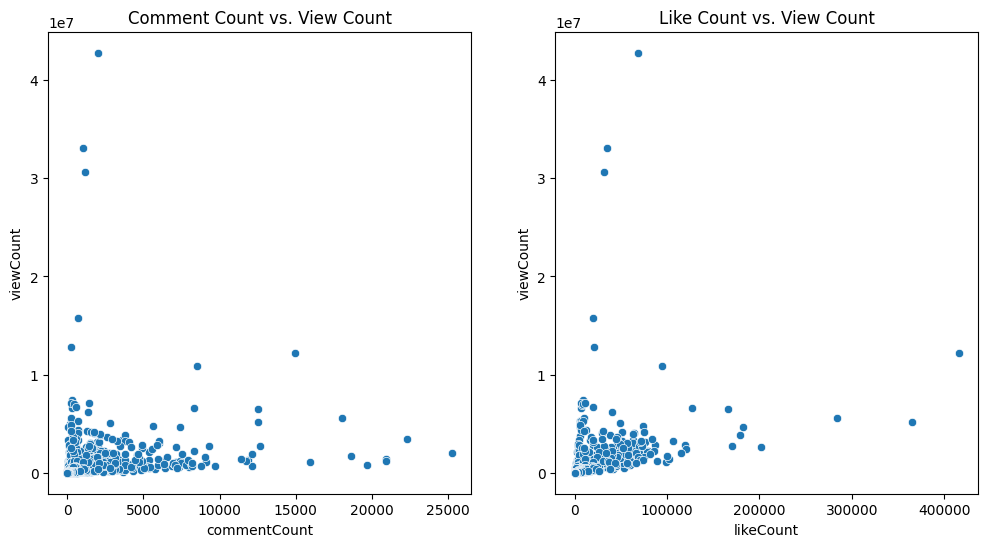

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=video_df_modified, x='commentCount', y='viewCount', ax=ax[0])
sns.scatterplot(data=video_df_modified, x='likeCount', y='viewCount', ax=ax[1])

ax[0].set_title('Comment Count vs. View Count')
ax[1].set_title('Like Count vs. View Count')

plt.show()

### Video duration

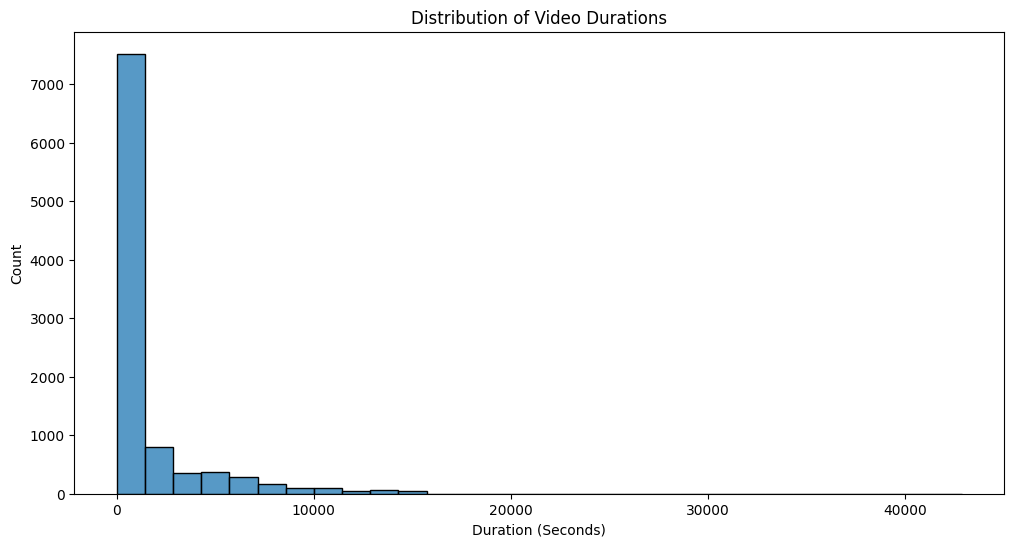

In [99]:
video_df_modified['durationSecs'] = video_df_modified['duration'].apply(lambda x: isodate.parse_duration(x))
video_df_modified['durationSecs'] = video_df_modified['durationSecs'].dt.total_seconds()

plt.figure(figsize=(12, 6))
sns.histplot(data=video_df_modified, x='durationSecs', bins=30)
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
plt.title('Distribution of Video Durations')

plt.show()


### Word Cloud Plot

C:\Users\Полина\AppData\Local\Temp\ipykernel_17772\4039088034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['title_no_stopwords'] = channel_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


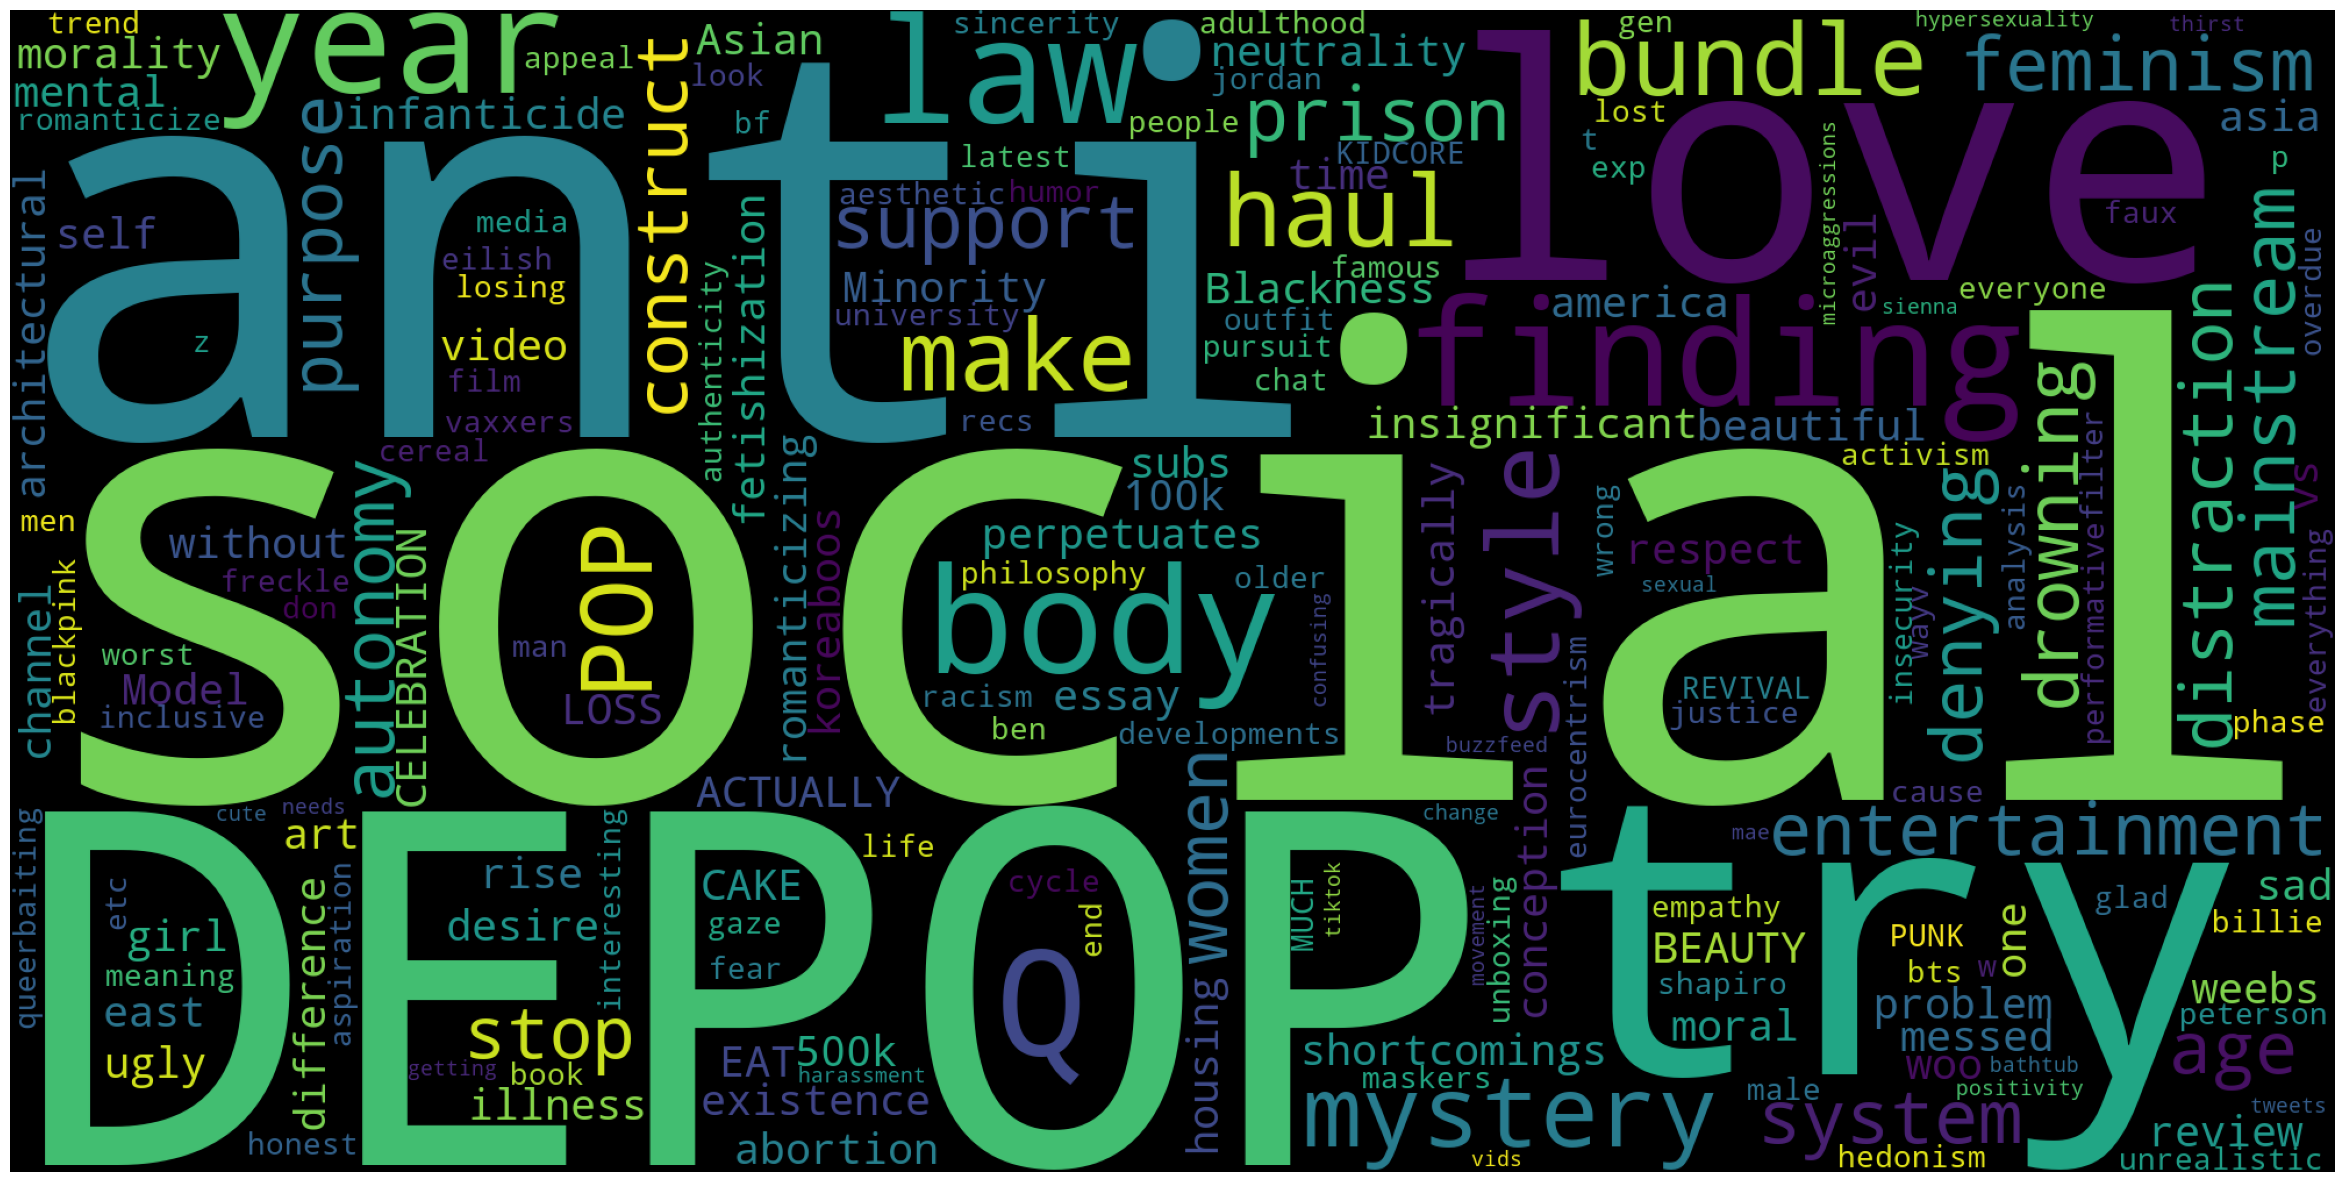

In [97]:
stop_words = set(stopwords.words('english'))
channel_name = 'oliSUNvia'

# Filter the DataFrame for the specific channel
channel_df = video_df_modified[video_df_modified['channelTitle'] == channel_name]

# Create a new column without stopwords
channel_df['title_no_stopwords'] = channel_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

# Concatenate all words from the filtered channel
all_words = list([a for b in channel_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis('off')

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)


## Linear model


In [105]:
channel_stats.columns

Index(['channelName', 'subscribers', 'views', 'playlistId', 'viewsProportion',
       'videoProportion', 'totalVideos', 'subscriber_to_view_ratio',
       'subscriber_growth_rate'],
      dtype='object')

In [106]:
channel_stats_clean = channel_stats.dropna()

C:\Users\Полина\AppData\Local\Temp\ipykernel_17772\677426391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_stats_clean.loc[:, 'totalVideos'] = channel_stats_clean['totalVideos'].astype(int)
C:\Users\Полина\AppData\Local\Temp\ipykernel_17772\677426391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_stats_clean.loc[:, 'views'] = channel_stats_clean['views'].astype(int)
C:\Users\Полина\AppData\Local\Temp\ipykernel_17772\677426391.py:4: SettingWithCopyWarning: 
A value is trying to be 

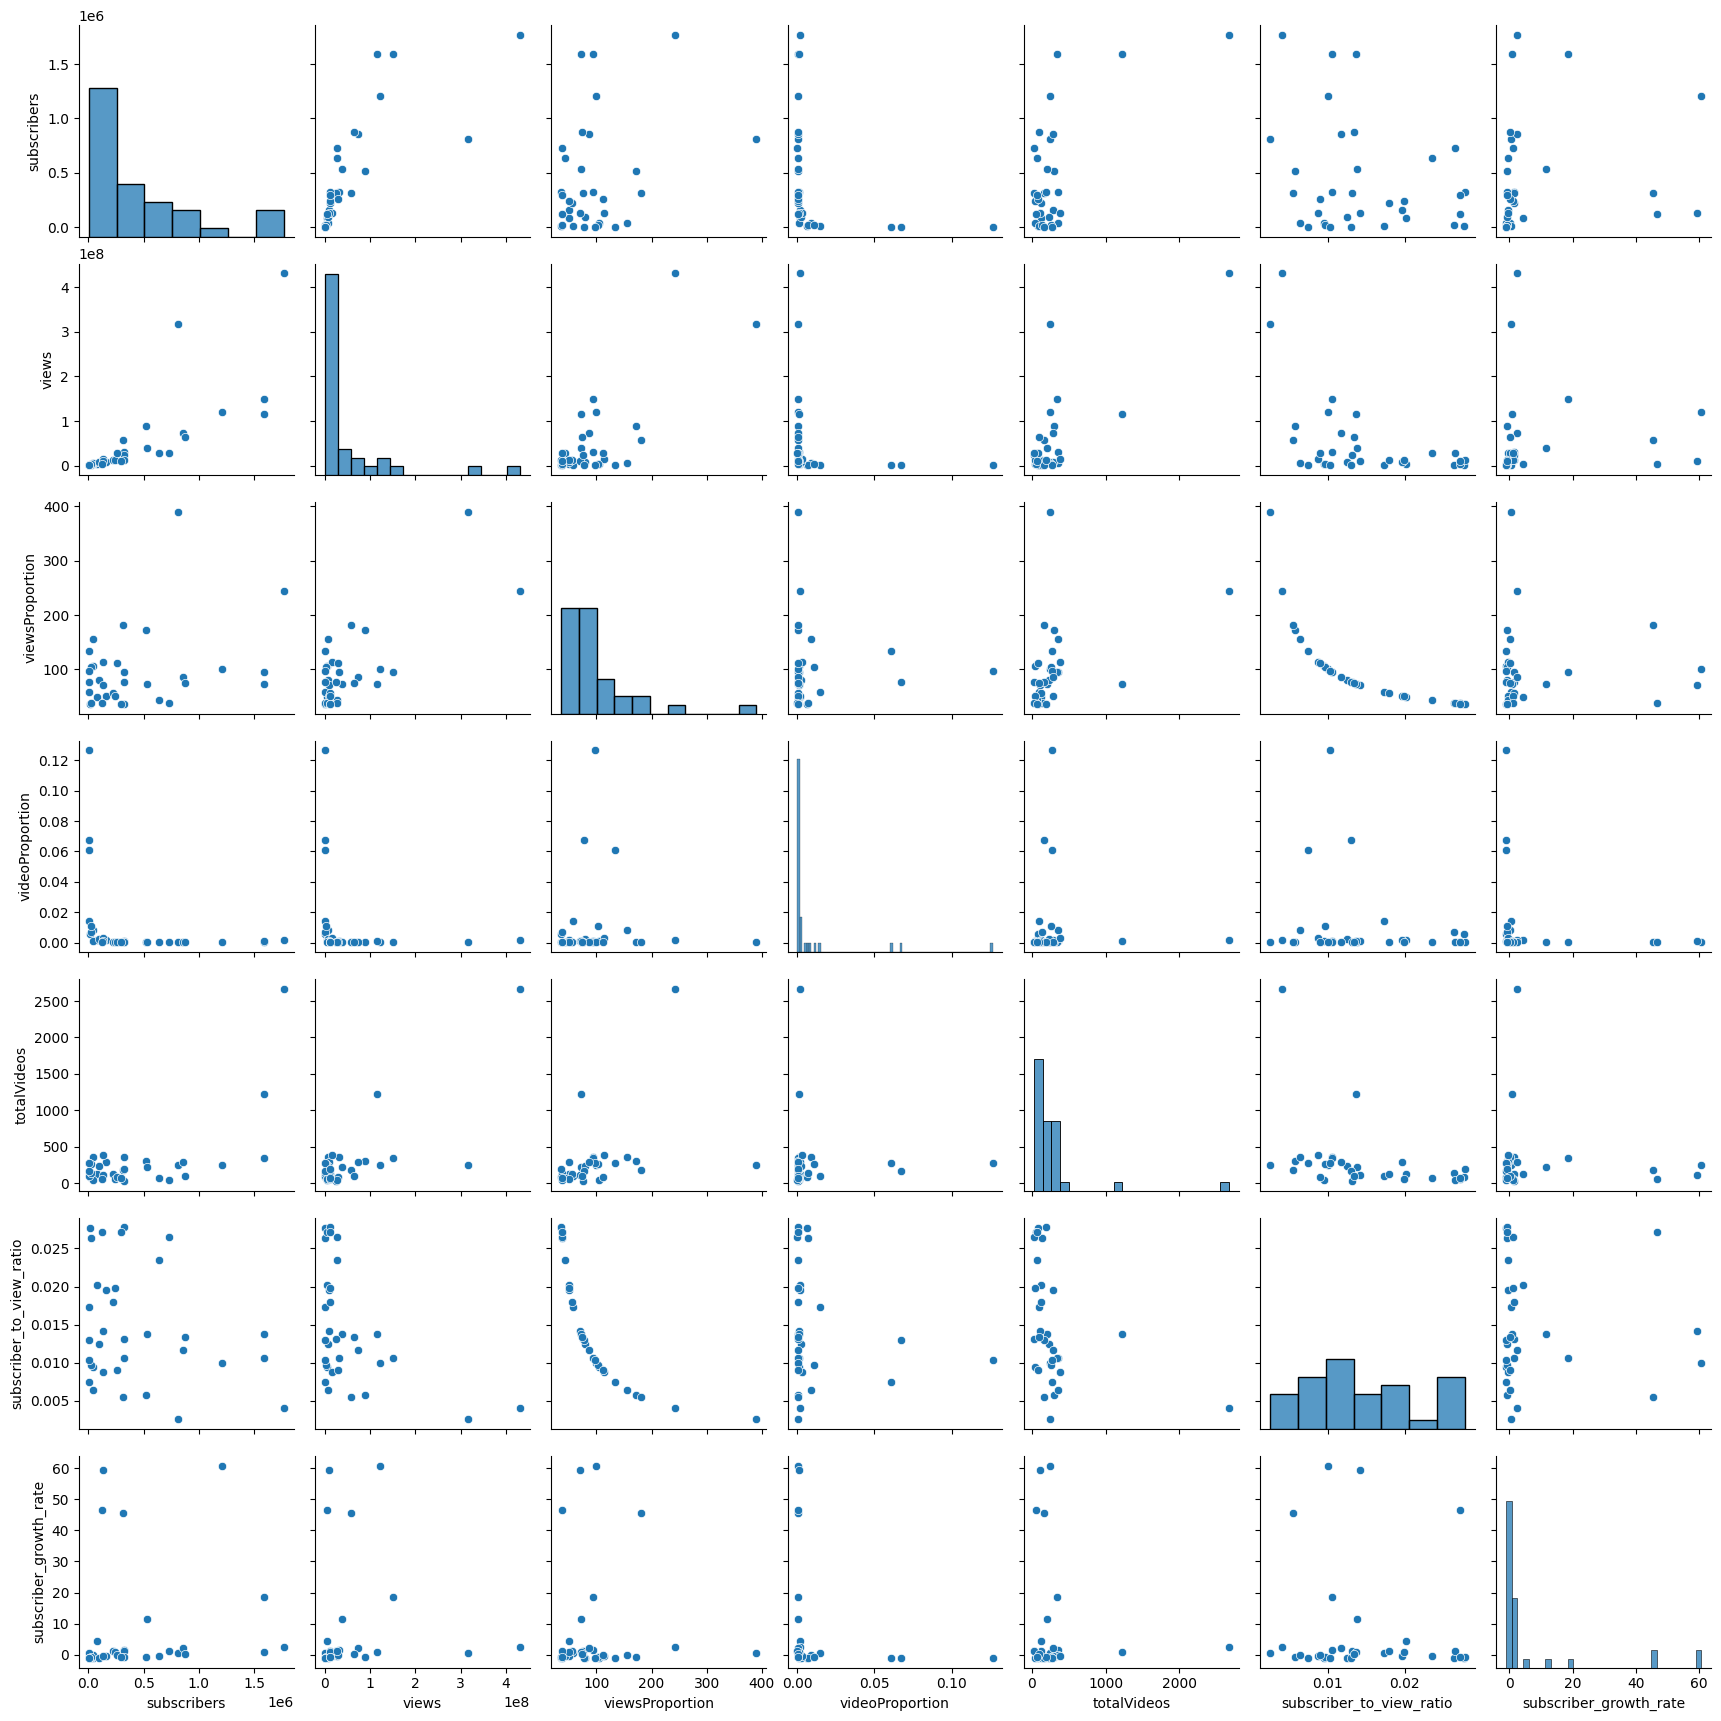

In [108]:
# Convert columns to the desired data types using .loc accessor
channel_stats_clean.loc[:, 'totalVideos'] = channel_stats_clean['totalVideos'].astype(int)
channel_stats_clean.loc[:, 'views'] = channel_stats_clean['views'].astype(int)
channel_stats_clean.loc[:, 'subscribers'] = channel_stats_clean['subscribers'].astype(int)

# Plot pairplot with the converted DataFrame
sns.pairplot(channel_stats_clean)


##### Here I tried to make a linear model based on the data. I am tring to predict the number of subscribers given the the number of video uploaded and number of video viewed. First started with the linear relation between two variables.

In [109]:
X = channel_stats_clean[['totalVideos', 'views']]
Y = channel_stats_clean[['subscribers']]

#### 20% of the data is randomly splitted for the testing purpose.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [111]:
lm = LinearRegression()
lm.fit(X_train.dropna(),y_train.dropna())

LinearRegression()

In [112]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

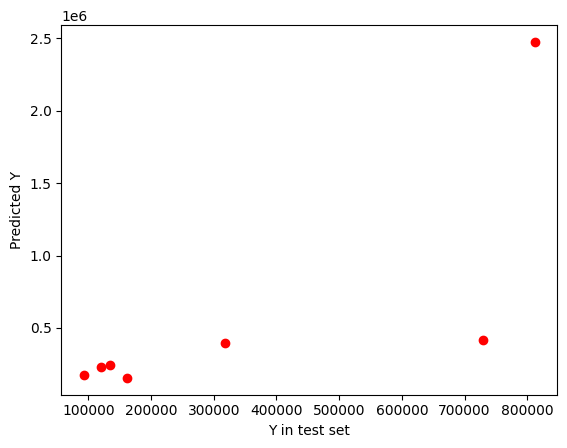

In [113]:
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

Text(0.5, 1.0, 'Standardized Residual Plot')

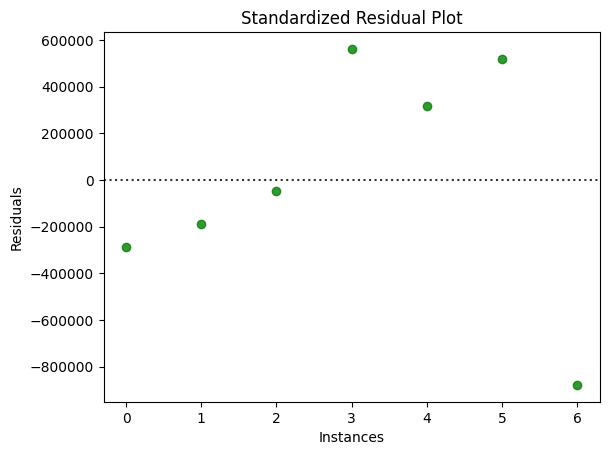

In [116]:
residuals = y_test - predictions
sns.residplot(x=np.arange(len(residuals)), y=residuals, color="green")
plt.ylabel('Residuals')
plt.xlabel('Instances')
plt.title('Standardized Residual Plot')


In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 338324.9771224506
MSE: 414643953466.89386
RMSE: 643928.5313347233


In [118]:
coefficients = pd.DataFrame(X.columns)
coefficients['coefficients']=lm.coef_[0]
coefficients

,0,coefficients
0,totalVideos,-448.390502
1,views,0.007455


In [120]:
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            subscribers   R-squared (uncentered):              -33858.329
Model:                            OLS   Adj. R-squared (uncentered):         -35974.537
Method:                 Least Squares   F-statistic:                             -16.00
Date:                Mon, 05 Jun 2023   Prob (F-statistic):                        1.00
Time:                        17:58:49   Log-Likelihood:                         -482.42
No. Observations:                  34   AIC:                                      968.8
Df Residuals:                      32   BIC:                                      971.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
totalVideos   251.4271    198.011      1.270      0.213    -151.908     654.762
views           0.0041      0.001      3.912      0.000       0.002       0.006
==============================================================================
Omnibus:                        2.147   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.041
Skew:                           0.207   Prob(JB):                        0.594
Kurtosis:                       3.750   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Working over the skewness of the data


Text(0, 0.5, 'Number of channels')

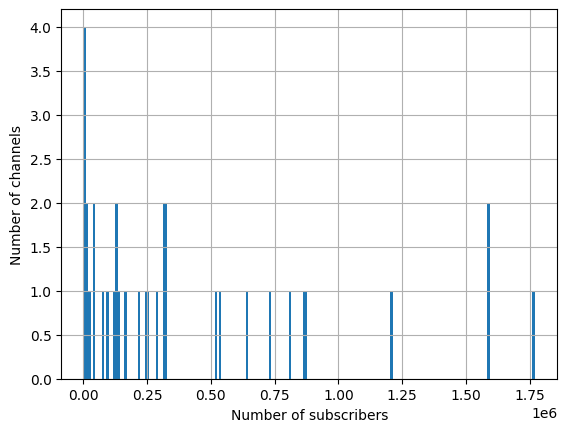

In [121]:
channel_stats['subscribers'].hist(bins = 200)
plt.xlabel('Number of subscribers')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

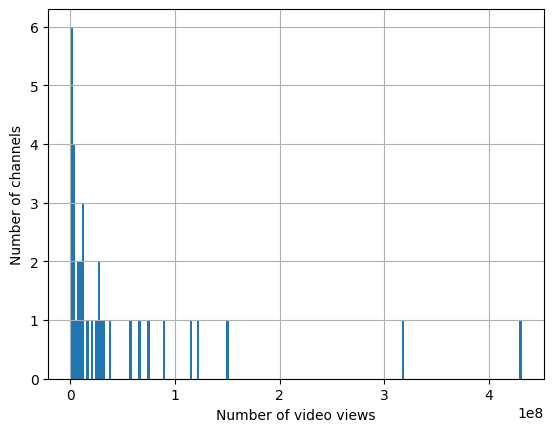

In [122]:
channel_stats['views'].hist(bins = 200)
plt.xlabel('Number of video views')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

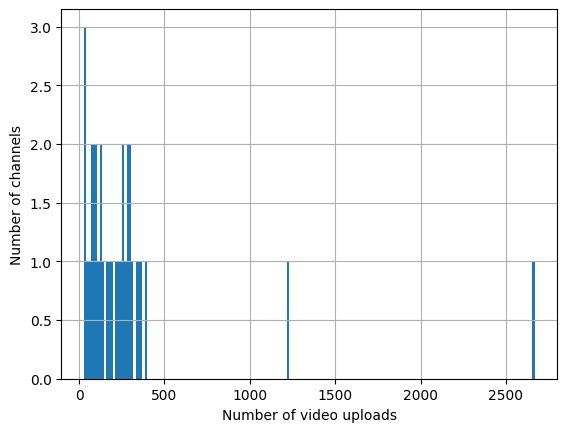

In [123]:
channel_stats['totalVideos'].hist(bins = 200)
plt.xlabel('Number of video uploads')
plt.ylabel('Number of channels')

### Log transformation



Text(0, 0.5, 'Number of channels')

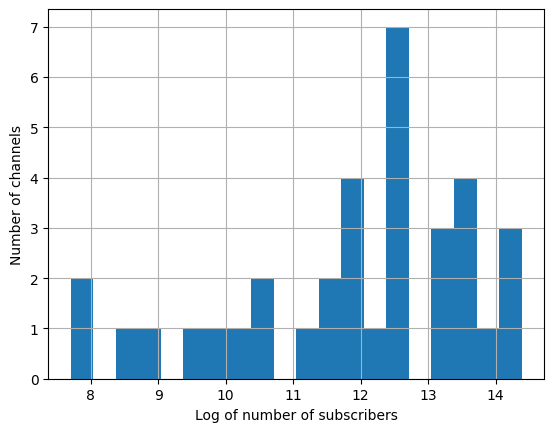

In [124]:
np.log(channel_stats['subscribers']).hist(bins = 20)
plt.xlabel('Log of number of subscribers')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

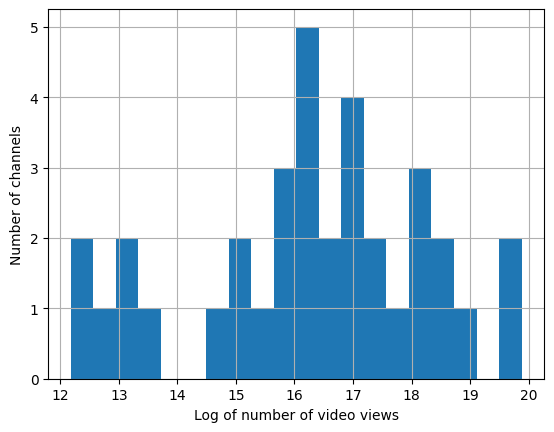

In [125]:
np.log(channel_stats['views']).hist(bins = 20)
plt.xlabel('Log of number of video views')
plt.ylabel('Number of channels')

Text(0, 0.5, 'Number of channels')

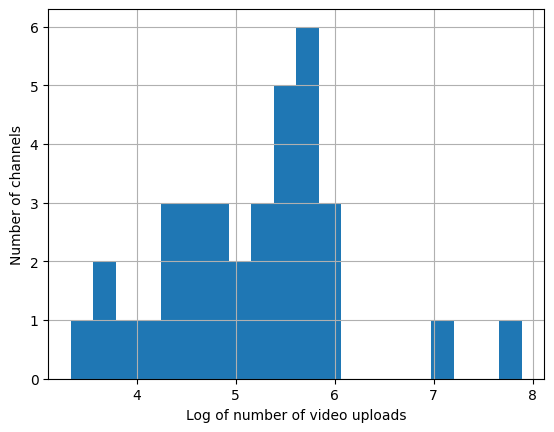

In [127]:
np.log(channel_stats['totalVideos']).hist(bins= 20)
plt.xlabel('Log of number of video uploads')
plt.ylabel('Number of channels')

In [128]:
df_log = pd.DataFrame()
df_log['Video_uploads_log'] = np.log(channel_stats_clean['totalVideos'])
df_log['Video_views_log'] = np.log(channel_stats_clean['views'])
df_log['Subscribers_log'] = np.log(channel_stats_clean['subscribers'])
df_log.head()

,Video_uploads_log,Video_views_log,Subscribers_log
1,5.872118,17.244007,12.694653
2,4.477337,13.191557,9.602382
3,4.836282,15.201966,11.299732
4,5.828946,18.823661,14.279245
5,5.723585,18.312336,13.161584


In [129]:
df_log.tail()

,Video_uploads_log,Video_views_log,Subscribers_log
30,7.106606,18.567248,14.279245
31,5.267858,16.265602,12.682307
32,3.637586,17.132906,13.500800
33,4.553877,17.988875,13.678545
34,4.304065,16.193514,12.587928


### Study of correlation with log transformation



<Axes: >

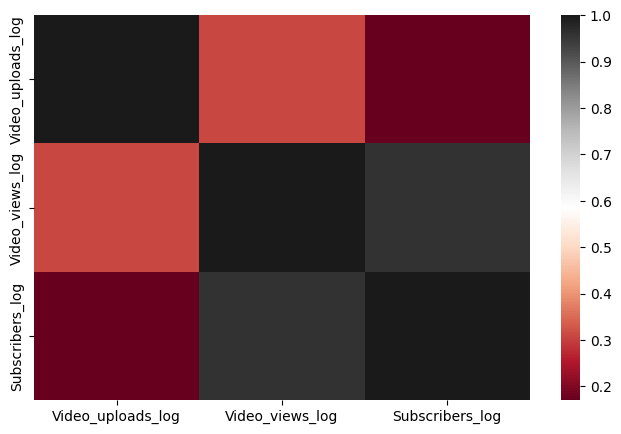

In [130]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df_log.corr(), cmap = 'RdGy')

#### From the above correlation plot the correlation coefficient of the variables have not been changed after the log transformation. At least the positive correlation remains the positive and vice versa.

#### But if we look at the scatter plot below, visually the negative correlation between video uploads and subscribers seem to have gone. This is the effect of log transformation which is not to be confued thinking they have positive correlations.

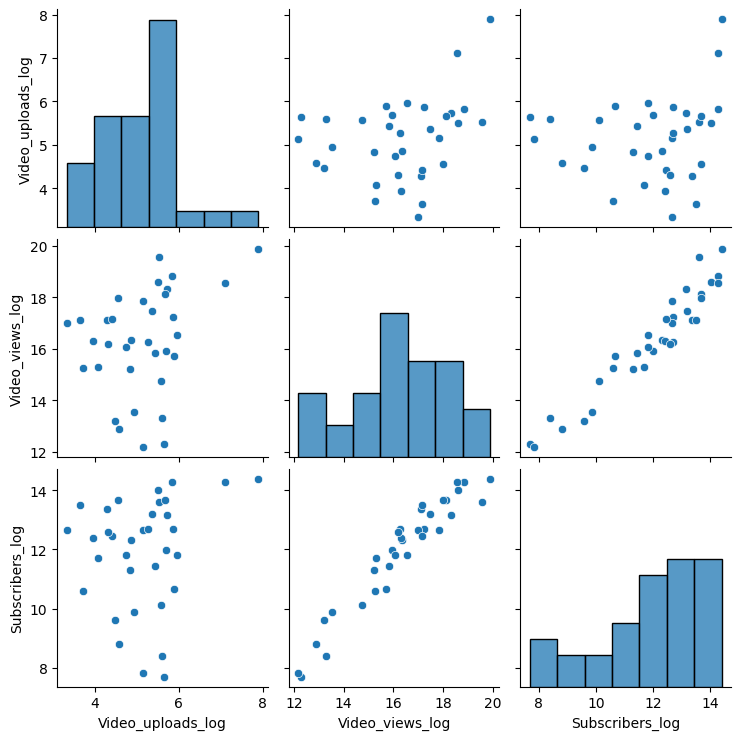

In [131]:
sns.pairplot(df_log)

### Linear model with log transformation



In [132]:
X2 = df_log[['Video_uploads_log', 'Video_views_log']]
Y2 = df_log[['Subscribers_log']]

In [133]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [134]:
lm2 = LinearRegression()
lm2.fit(X2_train.dropna(),y2_train.dropna())

LinearRegression()

In [135]:
predictions2 = lm2.predict(X2_test)

Text(0, 0.5, 'Predicted Y')

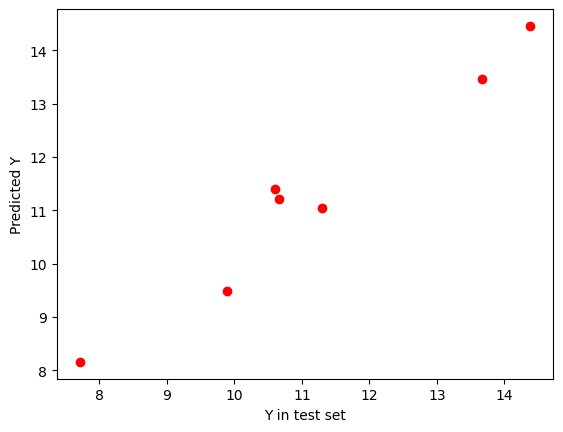

In [136]:
plt.scatter(y2_test,predictions2, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

Text(0.5, 1.0, 'Standardized Residual Plot')

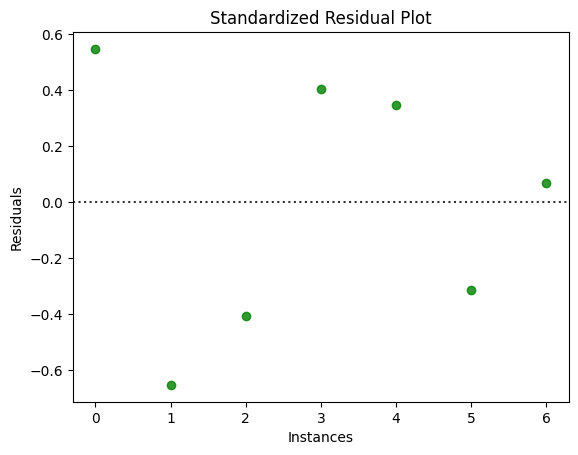

In [137]:
residuals = y2_test - predictions2
sns.residplot(x=np.arange(len(residuals)), y=residuals, color="green")
plt.ylabel('Residuals')
plt.xlabel('Instances')
plt.title('Standardized Residual Plot')

In [138]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 0.39127760072850926
MSE: 0.20294514538262085
RMSE: 0.45049433446228915


In [139]:
coefficients2 = pd.DataFrame(X2.columns)
coefficients2['coefficients']=lm2.coef_[0]
coefficients2

,0,coefficients
0,Video_uploads_log,-0.273815
1,Video_views_log,0.909208


In [141]:
model2 = sm.OLS(Y2, X2).fit() 
predictions2 = model2.predict(X2_test)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Subscribers_log   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              9245.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):                    6.30e-45
Time:                        18:10:37   Log-Likelihood:                         -24.762
No. Observations:                  34   AIC:                                      53.52
Df Residuals:                      32   BIC:                                      56.58
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Video_uploads_log    -0.3525      0.094     -3.762      0.001      -0.543      -0.162
Video_views_log       0.8441      0.030     28.338      0.000       0.783       0.905
==============================================================================
Omnibus:                        0.435   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.582
Skew:                          -0.139   Prob(JB):                        0.747
Kurtosis:                       2.423   Cond. No.                         19.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparing the result with and without log transformation

#### Without using log: Y = a X_1 + b X_2 + c

#### With log: ln(Y) = p ln(X_1) + q ln(X_2) + r

#### From the later: Y = exp( p .... ) = X_1 ^ p + X_2 ^ q + e^r

#### In the following, the prediction made by the log transformation is compared with the one done directly. The relation is mentioned in above shell.

In [142]:
p = coefficients2['coefficients'][0]
q = coefficients2['coefficients'][1]

In [143]:
def pred_from_log(x, y):
    return x ** p + y ** q

In [144]:
X_test.head()

,totalVideos,views
14,295,8270266
24,28,24259987
26,59,4425311
32,38,27588397
23,115,9423589


In [145]:
vid_upl_test = np.array(X_test['totalVideos'])
vid_viw_test = np.array(X_test['views'])

In [146]:
prediction_log = pred_from_log(vid_upl_test, vid_viw_test)

#### It is nice that both predictions are correleted.

Text(0, 0.5, 'prediction with log transformation')

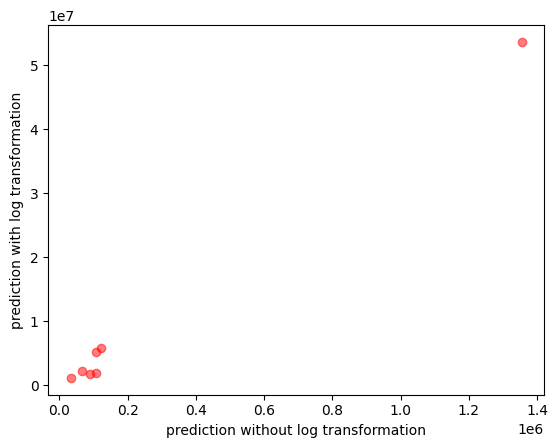

In [147]:
plt.scatter(predictions, prediction_log, color = 'r', alpha = 0.5)
plt.xlabel('prediction without log transformation')
plt.ylabel('prediction with log transformation')

#### The direct plot of the difference shows that log transformation tend to predict higher value than that without log if anything. There is no way it can predict lower though.



Text(0, 0.5, 'difference of prediction with and without log')

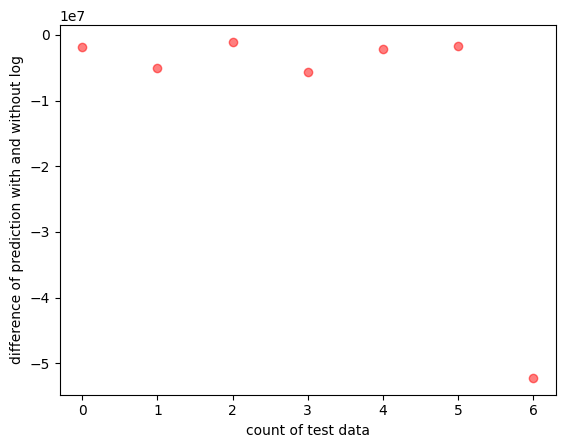

In [148]:
plt.scatter(range(len(X_test)), predictions - prediction_log, color = 'red', alpha = 0.5)
plt.xlabel('count of test data')
plt.ylabel('difference of prediction with and without log')

## Conclusion

#### The number of subscribers is proportional to the number of views.
#### The number of subscribers in negatively correlated witht the number of video uploads by the channel.
#### Linear model was tested for prediction of number of subscriber as a function of number of video uploads and number of video views.
#### Log transformation on the linear model gives the one sided biased prediction in comparison to the one without such transformation.